<a href="https://colab.research.google.com/github/EmyB44/ML_projet7/blob/main/Brosseau_Emilie_MLflow_projet_7_propre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit
!pip install scikit-learn
!pip install pdpbox
!pip install mlflow
!pip install imbalanced-learn
!pip install shap
!pip install absl-py==0.12.0
!pip install astunparse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, fbeta_score, precision_score, recall_score, make_scorer, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from imblearn.over_sampling import SMOTE
import mlflow
import streamlit as st
import os
import shutil
import logging
import shap
import mlflow.xgboost

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


from xgboost import XGBClassifier

# Disable warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Check available GPUs
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

# Disable logging
logging.disable(logging.WARNING)

Mounted at /content/drive
Num GPUs Available: 1


In [ ]:
data = pd.read_csv('/content/drive/My Drive/projet_7/final_dataframe.csv')

In [ ]:
df = data.dropna(axis=1)
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,INCOME_CREDIT_PERC
0,100002,1,0,0,0,0,202500.0,406597.5,0.018801,-9461,...,0,0,0,0,0,1,0,1,0,0.498036
1,100003,0,1,0,1,0,270000.0,1293502.5,0.003541,-16765,...,1,0,0,0,0,0,0,1,0,0.208736
2,100004,0,0,1,0,0,67500.0,135000.0,0.010032,-19046,...,0,0,0,0,0,0,0,0,0,0.500000
3,100006,0,1,0,0,0,135000.0,312682.5,0.008019,-19005,...,0,0,0,0,0,0,0,0,0,0.431748
4,100007,0,0,0,0,0,121500.0,513000.0,0.028663,-19932,...,0,0,0,0,0,0,0,0,0,0.236842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,0,0,0,1,0,157500.0,254700.0,0.032561,-9327,...,0,0,0,0,0,1,0,1,0,0.618375
307503,456252,0,1,0,0,0,72000.0,269550.0,0.025164,-20775,...,0,0,0,0,0,1,0,1,0,0.267112
307504,456253,0,1,0,0,0,153000.0,677664.0,0.005002,-14966,...,0,0,0,0,1,0,0,1,0,0.225776
307505,456254,1,1,0,0,0,171000.0,370107.0,0.005313,-11961,...,0,0,0,0,0,1,0,1,0,0.462029


In [ ]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [ ]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dummy

In [ ]:




# Create a sub-pipeline with SMOTE and DummyClassifier
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('dummy', DummyClassifier())
])

# Define the hyperparameter grid for the sub-pipeline
param_grid = {
    'dummy__strategy': ['stratified', 'most_frequent', 'prior', 'uniform']
}

# Create an instance of GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Fit the model and evaluate
grid_search.fit(X_train, y_train)
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

# Display the classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.92      0.50      0.65     56481
           1       0.08      0.50      0.14      5021

    accuracy                           0.50     61502
   macro avg       0.50      0.50      0.40     61502
weighted avg       0.85      0.50      0.61     61502



In [ ]:
# Utilisez la commande !sync pour vider le cache entre deux cellules
# Effacer les caches pour libérer de la mémoire
!sync && echo 3 | sudo tee /proc/sys/vm/drop_caches
import gc
gc.collect()


tee: /proc/sys/vm/drop_caches: Read-only file system
3


27

RANDOM FOREST


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

sub_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier())
])

pipeline = Pipeline([
    ('sub_pipeline', sub_pipeline)
])

# Définir les hyperparamètres pertinents pour le modèle Random Forest
param_grid = {
    'sub_pipeline__model__n_estimators': [100],
    'sub_pipeline__model__max_depth': [10]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Random Forest")
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score F1 avec CV:", grid_search.best_score_)

# Évaluez le meilleur modèle sur les données de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Afficher le rapport de classification
print("Meilleur modèle:", best_model.named_steps['sub_pipeline'].named_steps['model'].__class__.__name__)
print(classification_report(y_test, y_pred))


Random Forest
Meilleurs paramètres: {'sub_pipeline__model__max_depth': 10, 'sub_pipeline__model__n_estimators': 100}
Meilleur score F1 avec CV: 0.12000750621086369
Meilleur modèle: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     56481
           1       0.14      0.11      0.12      5021

    accuracy                           0.87     61502
   macro avg       0.53      0.52      0.53     61502
weighted avg       0.86      0.87      0.86     61502



RANDOM FOREST AVEC MLFLOW

In [ ]:




sub_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier())
])

pipeline = Pipeline([
    ('sub_pipeline', sub_pipeline)
])

# Définir les hyperparamètres pertinents pour le modèle Random Forest
param_grid = {
    'sub_pipeline__model__n_estimators': [100, 200, 300],
    'sub_pipeline__model__max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Commencer une nouvelle expérience MLflow
mlflow.start_run()

print("Random Forest")
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score F1 avec CV:", grid_search.best_score_)

# Enregistrer les métriques
mlflow.log_params(grid_search.best_params_)
mlflow.log_metric("f1_score", grid_search.best_score_)

# Enregistrer le modèle
best_model = grid_search.best_estimator_
mlflow.sklearn.log_model(best_model, "random_forest_model")

# Évaluez le meilleur modèle sur les données de test
y_pred = best_model.predict(X_test)

# Afficher le rapport de classification
print("Meilleur modèle:", best_model.named_steps['sub_pipeline'].named_steps['model'].__class__.__name__)
print(classification_report(y_test, y_pred))

# Terminer la session MLflow
mlflow.end_run()


In [ ]:
# Utilisez la commande !sync pour vider le cache entre deux cellules
# Effacer les caches pour libérer de la mémoire
!sync && echo 3 | sudo tee /proc/sys/vm/drop_caches
import gc
gc.collect()

XGBoost

In [ ]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Définir le modèle de classificateur XGBoost
model = XGBClassifier(random_state=42)
X_train.head(100).to_csv("X_train.csv", index= False)
X_test.head(100).to_csv("X_test.csv", index= False)

sub_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', model)
])

pipeline = Pipeline([
    ('sub_pipeline', sub_pipeline)
])

# Définir les hyperparamètres pertinents pour le modèle XGBoost
param_grid = {
    'sub_pipeline__model__n_estimators': [100],
    'sub_pipeline__model__max_depth': [3]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("XGBoost")
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score F1 avec CV:", grid_search.best_score_)

# Évaluez le meilleur modèle sur les données de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Afficher le rapport de classification
print("Meilleur modèle:", best_model.named_steps['sub_pipeline'].named_steps['model'].__class__.__name__)
print(classification_report(y_test, y_pred))


XGBoost
Meilleurs paramètres: {'sub_pipeline__model__max_depth': 3, 'sub_pipeline__model__n_estimators': 100}
Meilleur score F1 avec CV: 0.008782756773184498
Meilleur modèle: XGBClassifier
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56481
           1       0.18      0.00      0.01      5021

    accuracy                           0.92     61502
   macro avg       0.55      0.50      0.48     61502
weighted avg       0.86      0.92      0.88     61502



Avec suivi mlflow

In [ ]:
import mlflow
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline





# Définir les modèles de classificateurs que vous voulez tester
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
]

# Initialiser une expérience MLflow
mlflow.set_tracking_uri(f"file:///content/drive/My Drive/projet_7/mlflow")
  # Chemin vers le répertoire MLflow sur votre Google Drive

mlflow.set_experiment("Classifier Comparison")

best_model = None
best_score = float('-inf')

for name, model in models:
    sub_pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    pipeline = Pipeline([
        ('sub_pipeline', sub_pipeline)
    ])

    param_grid = {}  # Ajoutez les hyperparamètres pertinents pour chaque modèle

    if name == 'Random Forest':
        param_grid['sub_pipeline__model__n_estimators'] = [100, 200, 300]
        param_grid['sub_pipeline__model__max_depth'] = [None, 10, 20]
    elif name == 'XGBoost':
        param_grid['sub_pipeline__model__n_estimators'] = [100, 200, 300]
        param_grid['sub_pipeline__model__max_depth'] = [3, 4, 5]

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Commencer le suivi de l'exécution de l'algorithme avec MLflow
    with mlflow.start_run():
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metrics({"best_f1_score": grid_search.best_score_})

    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_

# Commencer le suivi de l'évaluation du meilleur modèle avec MLflow
with mlflow.start_run(run_name="Best Model Evaluation") as run:  # Notice the use of 'run' here
    y_pred = best_model.predict(X_test)

    # Loguer les métriques de performance
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in classification_rep.items():
        if isinstance(metrics, dict):
            for metric, value in metrics.items():
                mlflow.log_metric(f"{label}_{metric}", value)

    # Récupérer l'ID d'exécution à partir de la variable run
    run_id = run.info.run_id
    print("Run ID:", run_id)


    mlflow.log_param("best_model", best_model.named_steps['sub_pipeline'].named_steps['model'].__class__.__name__)

# Créer un répertoire pour les artefacts
    artifact_dir = '/content/drive/My Drive/mlflow_artifacts'
    os.makedirs(artifact_dir, exist_ok=True)

    # Enregistrer le meilleur modèle avec les artefacts
    mlflow.sklearn.save_model(best_model, os.path.join(artifact_dir, 'best_model'))
    mlflow.log_artifact(artifact_dir)



    # Enregistrer des artefacts - par exemple, un modèle pickle
    mlflow.sklearn.log_model(pipeline, "random_xgb")

# Fin de l'exécution de l'expérience
mlflow.end_run()


In [ ]:
import mlflow

# Charger l'exécution à partir de l'ID
run_id = "29cf9d1e0d5c4b1a865377b1cb17ae1c"
run = mlflow.get_run(run_id)

# Accéder aux scores
scores = run.data.metrics
print("Scores:", scores)


Cout métier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV

def custom_cost(y_true, y_pred, threshold=0.5, beta=1):
    y_pred_binary = (y_pred > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    return (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)



# Modèle "Random Forest"
model = RandomForestClassifier()

# Créez un pipeline avec SMOTE et le modèle "Random Forest"
pipeline = ImbPipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('model', model)
])

scorer = make_scorer(custom_cost, greater_is_better=False, needs_proba=True, threshold=0.5)

param_grid = {
    'model__n_estimators': [100],
    'model__max_depth': [10]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring={'Cost': scorer, 'AUC': 'roc_auc', 'Accuracy': 'accuracy'},
                           refit='Cost', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Custom cost score with CV:", -grid_search.best_score_)
print("AUC:", grid_search.cv_results_['mean_test_AUC'][grid_search.best_index_])
print("Accuracy:", grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_])


Best parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Custom cost score with CV: 0.033183341290540944
AUC: 0.6125013969738746
Accuracy: 0.9132497306965306


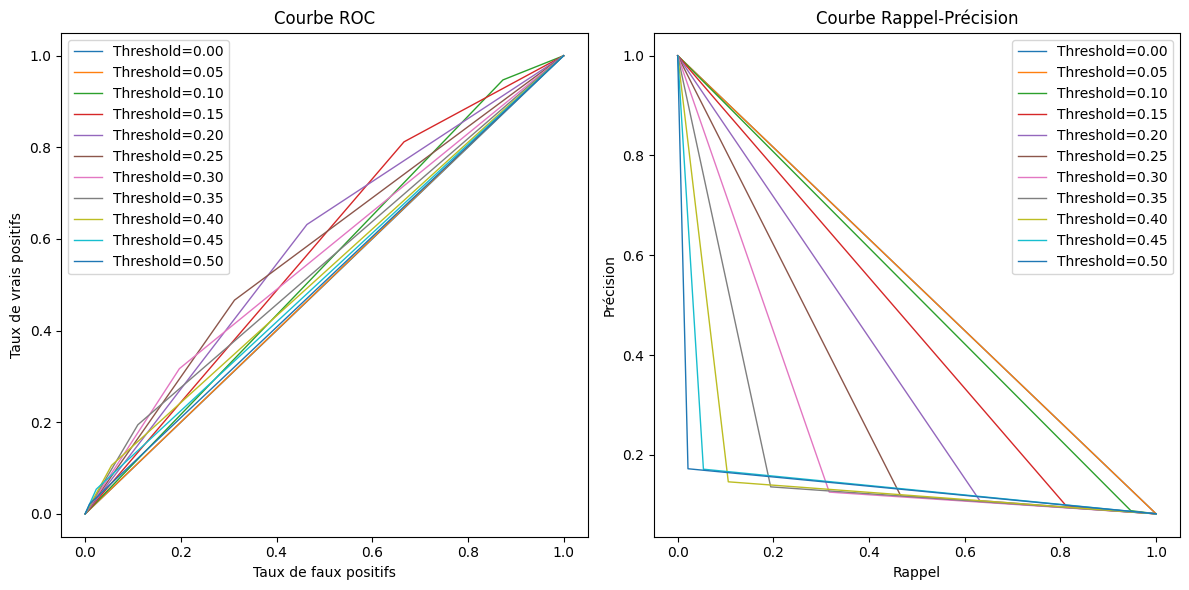

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Prédire les probabilités des classes positives
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

# Créer une gamme de seuils possibles de 0 à 0,5 avec un pas de 0,05
thresholds = np.arange(0, 0.51, 0.05)

# Initialisez des listes pour stocker les taux de faux positifs, les taux de vrais positifs, les précisions et les rappels
fpr = []
tpr = []
precision = []
recall = []

# Calculez les métriques pour chaque seuil
for threshold in thresholds:
    y_pred_binary = (y_pred_prob > threshold).astype(int)
    fpr_temp, tpr_temp, _ = roc_curve(y_test, y_pred_binary)
    precision_temp, recall_temp, _ = precision_recall_curve(y_test, y_pred_binary)
    fpr.append(fpr_temp)
    tpr.append(tpr_temp)
    precision.append(precision_temp)
    recall.append(recall_temp)

# Calculez la courbe ROC et la zone sous la courbe ROC (AUC-ROC)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(len(thresholds)):
    plt.plot(fpr[i], tpr[i], lw=1, label=f'Threshold={thresholds[i]:.2f}')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='best')

# Calculez la courbe de rappel-précision et la zone sous la courbe de rappel-précision (AUC-PR)
plt.subplot(1, 2, 2)
for i in range(len(thresholds)):
    plt.plot(recall[i], precision[i], lw=1, label=f'Threshold={thresholds[i]:.2f}')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Rappel-Précision')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Avec mlflow

In [ ]:
import mlflow
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

## Étape 1: Créer la fonction de coût métier
def custom_cost(y_true, y_pred, threshold=0.5, beta=1):
    y_pred_binary = (y_pred > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    return (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)





# Définir les modèles de classificateurs que vous voulez tester
models = [
    ('Random Forest', RandomForestClassifier())
]

best_model = None
best_score = float('-inf')

# Initialiser une expérience MLflow
mlflow.set_tracking_uri(f"file:///content/drive/My Drive/projet_7/mlflow")
mlflow.set_experiment("score_métier")

for name, model in models:
    # Create a pipeline with SMOTE and the current model
    pipeline = ImbPipeline([
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
        ('model', model)
    ])

    scorer = make_scorer(custom_cost, greater_is_better=False, needs_proba=True, threshold=0.5)

    param_grid = {}  # Add relevant hyperparameters for each model

    if name == 'Random Forest':
        param_grid['model__n_estimators'] = [100, 200, 300]
        param_grid['model__max_depth'] = [None, 10, 20]

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                               scoring={'Cost': scorer, 'AUC': 'roc_auc', 'Accuracy': 'accuracy'},
                               refit='Cost', cv=5)
    grid_search.fit(X_train, y_train)

    print(name)
    print("Best parameters:", grid_search.best_params_)
    print("Custom cost score with CV:", -grid_search.best_score_)
    print("AUC:", grid_search.cv_results_['mean_test_AUC'][grid_search.best_index_])
    print("Accuracy:", grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_])

    # Logging parameters and metrics to MLflow (corrected indentation)
    with mlflow.start_run():
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("CustomCost", -grid_search.best_score_)
        mlflow.log_metric("AUC", grid_search.cv_results_['mean_test_AUC'][grid_search.best_index_])
        mlflow.log_metric("Accuracy", grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_])

    if -grid_search.best_score_ > best_score:
        best_score = -grid_search.best_score_
        best_model = grid_search.best_estimator_

    # Get the URI of the active run
    active_run = mlflow.active_run()

    if active_run is not None:
        run_id = active_run.info.run_id
        print("Run ID:", run_id)
    else:
        print("No active MLflow run found.")

# Log the best model if available
if best_model is not None:
    mlflow.sklearn.log_model(best_model, "best_model")
    mlflow.sklearn.log_model(pipeline, "cout_metier")

# Fin de l'exécution de l'expérience
mlflow.end_run()

In [ ]:
import mlflow
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Étape 1: Créer la fonction de coût métier
def custom_cost(y_true, y_pred, threshold=0.5, beta=1):
    y_pred_binary = (y_pred > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
    return (1 + beta**2) * tp / ((1 + beta**2) * tp + beta**2 * fn + fp)





# Définir les modèles de classificateurs que vous voulez tester
models = [
    ('Random Forest', RandomForestClassifier())
]

best_model = None
best_score = float('-inf')

# Initialiser une expérience MLflow
mlflow.set_tracking_uri(f"file:///content/drive/My Drive/projet_7/mlflow")
mlflow.set_experiment("score_métier")

for name, model in models:
    # Create a pipeline with SMOTE and the current model
    pipeline = ImbPipeline([
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
        ('model', model)
    ])

    scorer = make_scorer(custom_cost, greater_is_better=False, needs_proba=True, threshold=0.5)

    param_grid = {}  # Add relevant hyperparameters for each model

    if name == 'Random Forest':
        param_grid['model__n_estimators'] = [100, 200, 300]
        param_grid['model__max_depth'] = [None, 10, 20]

    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                               scoring={'Cost': scorer, 'AUC': 'roc_auc', 'Accuracy': 'accuracy'},
                               refit='Cost', cv=5)
    grid_search.fit(X_train, y_train)

    print(name)
    print("Best parameters:", grid_search.best_params_)
    print("Custom cost score with CV:", -grid_search.best_score_)
    print("AUC:", grid_search.cv_results_['mean_test_AUC'][grid_search.best_index_])
    print("Accuracy:", grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_])

    # Démarrer une nouvelle exécution MLflow
    with mlflow.start_run():
        # Enregistrer les paramètres
        mlflow.log_params(grid_search.best_params_)
        # Enregistrer les métriques
        mlflow.log_metric("CustomCost", -grid_search.best_score_)
        mlflow.log_metric("AUC", grid_search.cv_results_['mean_test_AUC'][grid_search.best_index_])
        mlflow.log_metric("Accuracy", grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_])
        # Enregistrer le modèle
        mlflow.sklearn.log_model(grid_search.best_estimator_, "best_model")

        # Calculer les valeurs individuelles de fn, fp, tp et tn sur les données de test
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        confusion_matrix_result = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = confusion_matrix_result.ravel()

        # Enregistrer les valeurs de la matrice de confusion
        mlflow.log_metric("TrueNegatives", tn)
        mlflow.log_metric("FalsePositives", fp)
        mlflow.log_metric("FalseNegatives", fn)
        mlflow.log_metric("TruePositives", tp)

    if -grid_search.best_score_ > best_score:
        best_score = -grid_search.best_score_
        best_model = grid_search.best_estimator_

# Fin de l'exécution de l'expérience
mlflow.end_run()


XGBOOST MEILLEUR MODELE ET FEATURE SHAP

In [ ]:


# Définir l'URI de suivi MLflow et l'expérience
# mlflow.set_tracking_uri(f"file:///content/drive/My Drive/projet_7/mlflow")
# mlflow.set_experiment("shap")

# # Créer un DataFrame pandas avec des noms de colonnes
# feature_names = [f"feature_{i}" for i in range(X.shape[1])]
# X_df = pd.DataFrame(X, columns=feature_names)


# Diviser les données en ensembles d'entraînement et de test
X_train.head(100).to_csv("X_train.csv", index= False)

# Définir le modèle XGBoost
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=3)

# Créer une sous-pipeline avec SMOTE
sub_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', xgb_model)
])

# Créer le pipeline global
pipeline = Pipeline([
    ('sub_pipeline', sub_pipeline)
])

# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Commencer le suivi de l'évaluation du modèle avec MLflow
 with mlflow.start_run(run_name="XGBoost Model Evaluation"):
     y_pred = pipeline.predict(X_test)

     # Loguer les métriques de performance
     classification_rep = classification_report(y_test, y_pred, output_dict=True)
     for label, metrics in classification_rep.items():
         if isinstance(metrics, dict):
             for metric, value in metrics.items():
                 mlflow.log_metric(f"{label}_{metric}", value)

     # Loguer le nom du modèle
     mlflow.log_param("best_model", xgb_model.__class__.__name__)
     # Enregistrer des artefacts - par exemple, un modèle pickle
     mlflow.sklearn.log_model(pipeline, "best_xgb")

#     # Récupérer l'ID d'exécution
     run_id = mlflow.active_run().info.run_id
     print("Run ID:", run_id)


 # Fin de l'exécution de l'expérience
 mlflow.end_run()


 # Calculer les valeurs SHAP pour chaque prédiction
 explainer = shap.Explainer(pipeline.named_steps['sub_pipeline'].named_steps['model'])
 shap_values = explainer.shap_values(X_test)

# # Afficher les graphiques de résumé SHAP sans spécifier les noms des caractéristiques
 shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

In [ ]:
import mlflow

# Charger l'exécution à partir de l'ID
run_id = "1ba2197a3e2c45cb85efe0e93789a792"
run = mlflow.get_run(run_id)

# Accéder aux scores
scores = run.data.metrics
print("Scores:", scores)


In [ ]:
import pandas as pd
import mlflow
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
import shap
import plotly.graph_objs as go
import plotly.offline as pyo

# Créer un DataFrame pandas avec des noms de colonnes
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=feature_names)

# Définir le modèle XGBoost
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=3)

# Créer une sous-pipeline avec SMOTE
sub_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', xgb_model)
])

# Créer le pipeline global
pipeline = Pipeline([
    ('sub_pipeline', sub_pipeline)
])

# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = pipeline.predict(X_test)

# Calculer le rapport de classification
classification_rep = classification_report(y_test, y_pred)

# Calculer les valeurs SHAP pour chaque prédiction
explainer = shap.Explainer(pipeline.named_steps['sub_pipeline'].named_steps['model'])
shap_values = explainer.shap_values(X_test)

# Sélectionnez l'instance que vous souhaitez visualiser (par exemple, la première instance)
selected_instance = 0

# Obtenir les valeurs SHAP pour l'instance sélectionnée
shap_instance = shap_values[selected_instance]

# Obtenez les noms de colonnes pour vos fonctionnalités
feature_names = X_test.columns  # Assurez-vous que cela correspond à vos noms de colonnes

# Sélectionnez les N fonctionnalités les plus importantes
top_n = 20
top_features_idx = shap_instance.argsort()[-top_n:][::-1]
top_feature_names = feature_names[top_features_idx]
top_shap_values = shap_instance[top_features_idx]

# Créez un graphique à barres pour afficher les N fonctionnalités les plus importantes
bar_chart = go.Bar(x=top_shap_values, y=top_feature_names, orientation='h')

# Créez une mise en page de graphique
layout = go.Layout(
    title=f"Top {top_n} SHAP Values for Instance {selected_instance}",
    xaxis=dict(title="SHAP Value", automargin=True),  # Ajustez la marge automatiquement
    yaxis=dict(title="Feature", tickvals=top_feature_names, tickangle=0, automargin=True)
)
# Créez la figure du graphique
fig = go.Figure(data=[bar_chart], layout=layout)

# Ajustez la taille de la figure pour éviter la troncation des noms de colonnes
fig.update_layout(height=400, width=800, margin=dict(l=100))  # Ajustez la marge gauche (l=100)

# Affichez la figure en utilisant Plotly
pyo.iplot(fig)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[20:11:51] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.

